# Khai báo thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
#------------------------------------------------------------------
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#------------------------------------------------------------------
from scipy.stats import uniform
from scipy.cluster.hierarchy import dendrogram, linkage
#------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
#------------------------------------------------------------------
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import AgglomerativeClustering
#------------------------------------------------------------------
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import make_scorer
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

# Data

In [2]:
df = pd.read_csv("D:\_Dev\_Group Project\Affinity-Propagation-ML-UEH\Data\Mall Customers\Mall_Customers_preprocessed.csv")
X = df.drop(columns=["customerid"])

In [3]:
data = df.drop(columns=["customerid",],axis=1,)
X = data.copy()

In [4]:
print(f"Mall_Customers_preprocessed")
data.head()

Mall_Customers_preprocessed


,age,annual_income,spending_score,genre_female
0,-1.424569,-1.738999,-0.434801,0.0
1,-1.281035,-1.738999,1.195704,0.0
2,-1.352802,-1.700830,-1.715913,1.0
3,-1.137502,-1.700830,1.040418,1.0
4,-0.563369,-1.662660,-0.395980,1.0


# Vẽ biểu đồ Dendrogram - Thể hiện khoảng cách các cụm

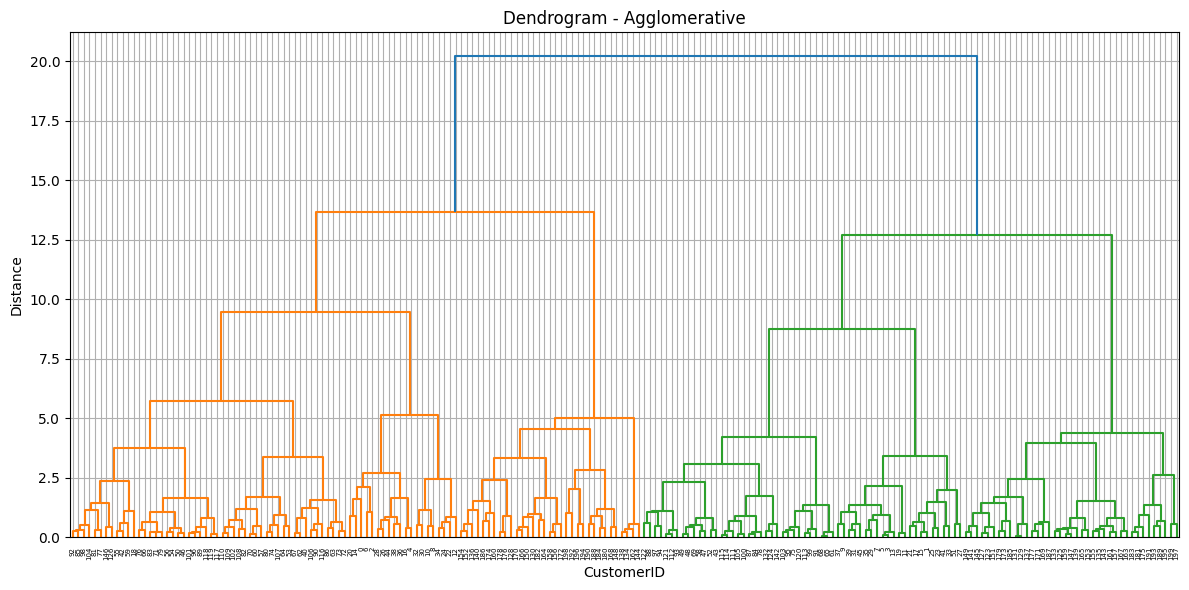

In [5]:
linked = linkage(X, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title("Dendrogram - Agglomerative")
plt.xlabel("CustomerID")
plt.ylabel("Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

# Agglomerative

In [6]:
#Thực hiện Agglomerative
agg = AgglomerativeClustering(n_clusters=6, linkage='ward') #Số lượng cụm đã được Optimize
agg_labels = agg.fit_predict(X)

In [7]:
n_clusters_agg = len(np.unique(agg_labels))
silhouette_agg = silhouette_score(X, agg_labels)
davies_bouldin_agg = davies_bouldin_score(X, agg_labels)
calinski_harabasz_agg = calinski_harabasz_score(X, agg_labels)
print(f"Agglomerative:")
print(f"- Số lượng cụm: {n_clusters_agg}")
print(f"- Silhouette Score: {silhouette_agg:.3f}")
print(f"- Davies Bouldin: {davies_bouldin_agg:.3f}")
print(f"- Calinski Harabaz: {calinski_harabasz_agg:.3f}")

Agglomerative:
- Số lượng cụm: 6
- Silhouette Score: 0.350
- Davies Bouldin: 1.009
- Calinski Harabaz: 95.258


In [8]:
#Giảm số chiều về 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

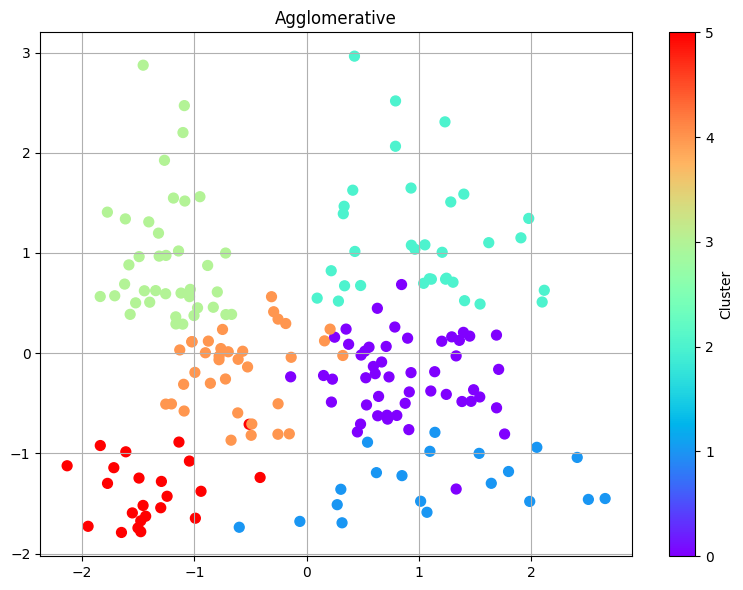

In [9]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels, cmap='rainbow', s=50)
plt.title("Agglomerative")
plt.grid(True)
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()